## Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML tutorials/Naive Bayes/titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [4]:
X=df[['Pclass','Sex','Age','Fare']]
y=df['Survived']

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'])
X

<ipython-input-5-6bea0679ff84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=le.fit_transform(X['Sex'])


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [6]:
age_mean=X['Age'].mean()
age_mean=round(age_mean,0)
X['Age']=X['Age'].fillna(age_mean)

<ipython-input-6-0d07e456f6fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=X['Age'].fillna(age_mean)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[['Age']]=scaler.fit_transform(X[['Age']])
X[['Fare']]=scaler.fit_transform(X[['Fare']])
X

<ipython-input-7-5ca8661eb39c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age']]=scaler.fit_transform(X[['Age']])
<ipython-input-7-5ca8661eb39c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Fare']]=scaler.fit_transform(X[['Fare']])


,Pclass,Sex,Age,Fare
0,3,1,0.271174,0.014151
1,1,0,0.472229,0.139136
2,3,0,0.321438,0.015469
3,1,0,0.434531,0.103644
4,3,1,0.434531,0.015713
...,...,...,...,...
886,2,1,0.334004,0.025374
887,1,0,0.233476,0.058556
888,3,0,0.371701,0.045771
889,1,1,0.321438,0.058556


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

#### **GaussianNB**: Assumes continuous data that follow a Gaussian distribution.
#### **CategoricalNB**: Assumes categorical data.
#### **MultinomialNB**: Assumes discrete data representing counts or frequencies.

In This case, we'll use **CategoricalNB** since our target is categorical in nature

In [9]:
cross_val_score(CategoricalNB(),X,y,cv=4)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 1530, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
IndexErr

array([0.79820628, 0.80717489,        nan, 0.78828829])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
model=CategoricalNB()
model.fit(X_train,y_train)

CategoricalNB()

In [12]:
model.score(X_test,y_test)

0.7910447761194029

In [13]:
y_predicted=model.predict(X_test)

<Axes: >

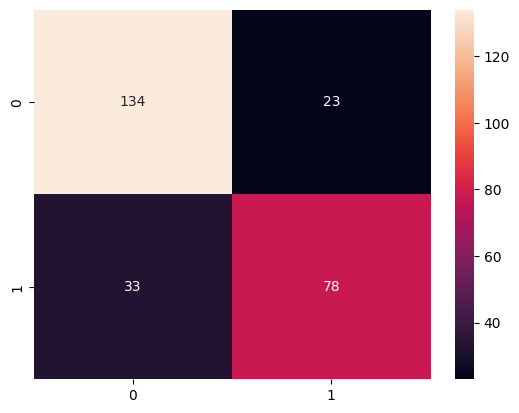

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='g')

## Email Spam filter

In [15]:
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv('/content/drive/MyDrive/ML tutorials/Naive Bayes/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [18]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**ham=0** , **spam=1** after applying Label Encoding

In [20]:
X=df['Message']
y=df['Category']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)

In [23]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X_test_count=v.transform(X_test)

In [26]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [28]:
model.score(X_test_count,y_test)

0.9919282511210762

In [29]:
model.predict(X_test_count)

array([0, 0, 0, ..., 0, 0, 0])

Using **Sklearn Pipeline**

In [30]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [31]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [32]:
clf.score(X_test,y_test)

0.9919282511210762

In [33]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

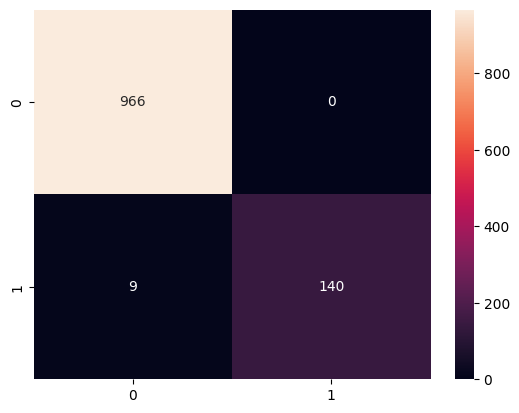

In [34]:
y_predicted=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='g')